In [1]:
import datetime
from datetime import datetime
import datetime
from yahoo_fin import stock_info as si
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape

In [2]:
# !pip install yahoo-fin --user

# pip install selenium --user

In [3]:
# start = 2018

# df = si.get_data('BRK-A')
# df = df.loc[df.index > pd.to_datetime(f'01-01-{start}')]
# # df = df.reset_index()
# df

In [4]:
def ticker(Ticker, year):
    Ticker = Ticker.replace('.', '-')
    df = si.get_data(Ticker)
    df = df.loc[df.index > pd.to_datetime(f'01-01-{year}')]
    df['Diff'] = df['close'].diff()
    df = df.dropna()
    return df

In [5]:
df = ticker('MMM', 2020)
df['B/S'] = df['Diff'].map(lambda x : 'Sell' if x >0 else 'Buy')
df.head()

,open,high,low,close,adjclose,volume,ticker,Diff,B/S
2020-01-03,177.020004,178.660004,175.630005,178.449997,161.841217,2466900,MMM,-1.550003,Buy
2020-01-06,177.149994,178.710007,176.350006,178.619995,161.995422,1998000,MMM,0.169998,Sell
2020-01-07,178.279999,178.509995,176.820007,177.899994,161.342422,2173000,MMM,-0.720001,Buy
2020-01-08,178.000000,181.500000,177.649994,180.630005,163.818359,2758300,MMM,2.730011,Sell
2020-01-09,181.509995,181.589996,179.759995,181.199997,164.335327,2746300,MMM,0.569992,Sell


In [7]:
# Corr = df['close'].corr(df['volume'])
# Corr
df.loc[df.index.max(), 'open']

113.51000213623047

<AxesSubplot:>

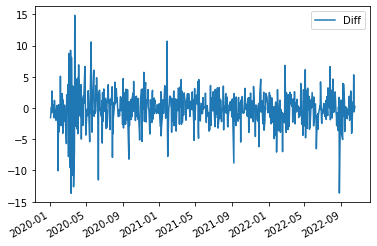

In [6]:
df[['Diff']].plot()

In [7]:
last_day = df.index.max() 
last_day 

Timestamp('2022-10-17 00:00:00')

In [8]:
sep = datetime.datetime(2022, 6, 1)

In [9]:
train = df[df.index < sep ][['Diff']]
display(train.head())
train.tail()

,Diff
2020-01-03,-1.550003
2020-01-06,0.169998
2020-01-07,-0.720001
2020-01-08,2.730011
2020-01-09,0.569992


,Diff
2022-05-24,1.369995
2022-05-25,0.039993
2022-05-26,1.250000
2022-05-27,2.470001
2022-05-31,-0.220001


In [10]:
test = df[df.index >= sep][['Diff']]
test.head(10)

,Diff
2022-06-01,-2.869995
2022-06-02,1.759995
2022-06-03,-2.209991
2022-06-06,0.240005
2022-06-07,0.659988
2022-06-08,-1.449997
2022-06-09,-1.240005
2022-06-10,-6.529999
2022-06-13,-1.279999
2022-06-14,-1.119995


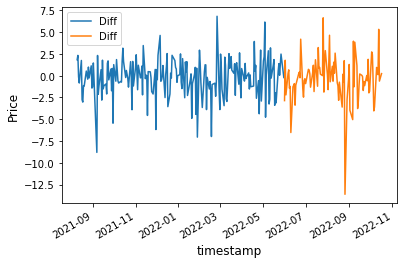

In [11]:
pd.concat([train,test],axis=1).tail(300).plot()
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [12]:
scaler = MinMaxScaler()
train['Diff_scaler'] = scaler.fit_transform(train)
train.tail()

,Diff,Diff_scaler
2022-05-24,1.369995,0.527183
2022-05-25,0.039993,0.480533
2022-05-26,1.250000,0.522974
2022-05-27,2.470001,0.565767
2022-05-31,-0.220001,0.471414


In [13]:
test['Diff_scaler'] = scaler.transform(test)
test.tail()

,Diff,Diff_scaler
2022-10-11,0.379997,0.492459
2022-10-12,0.110001,0.482989
2022-10-13,5.310005,0.665381
2022-10-14,-0.630005,0.457033
2022-10-17,0.230003,0.487198


In [14]:
X = train[['Diff_scaler']].values
y = test[['Diff_scaler']].values

In [15]:
print(X.shape)
print(y.shape)

(607, 1)
(96, 1)


In [16]:
timesteps=10

In [17]:
X_timesteps=np.array([[j for j in X[i:i+timesteps]] for i in range(0,len(X)-timesteps+1)])[:,:,0]
X_timesteps.shape

(598, 10)

In [18]:
X_timesteps

array([[0.42476323, 0.48509298, 0.45387588, ..., 0.49491405, 0.42336045,
        0.52227283],
       [0.48509298, 0.45387588, 0.57488648, ..., 0.42336045, 0.52227283,
        0.49105627],
       [0.45387588, 0.57488648, 0.49912293, ..., 0.52227283, 0.49105627,
        0.41038218],
       ...,
       [0.46895859, 0.52122061, 0.54366885, ..., 0.52718336, 0.480533  ,
        0.52297448],
       [0.52122061, 0.54366885, 0.35952295, ..., 0.480533  , 0.52297448,
        0.56576653],
       [0.54366885, 0.35952295, 0.41003216, ..., 0.52297448, 0.56576653,
        0.47141359]])

In [19]:
y_timesteps=np.array([[j for j in y[i:i+timesteps]] for i in range(0,len(y)-timesteps+1)])[:,:,0]
y_timesteps.shape

(87, 10)

In [20]:
y_timesteps

array([[0.37846397, 0.54086275, 0.40161387, 0.48754851, 0.50227959,
        0.42827099, 0.43563652, 0.25008784, 0.43423374, 0.43984593],
       [0.54086275, 0.40161387, 0.48754851, 0.50227959, 0.42827099,
        0.43563652, 0.25008784, 0.43423374, 0.43984593, 0.44686091],
       [0.40161387, 0.48754851, 0.50227959, 0.42827099, 0.43563652,
        0.25008784, 0.43423374, 0.43984593, 0.44686091, 0.36022461],
       [0.48754851, 0.50227959, 0.42827099, 0.43563652, 0.25008784,
        0.43423374, 0.43984593, 0.44686091, 0.36022461, 0.44054706],
       [0.50227959, 0.42827099, 0.43563652, 0.25008784, 0.43423374,
        0.43984593, 0.44686091, 0.36022461, 0.44054706, 0.48509298],
       [0.42827099, 0.43563652, 0.25008784, 0.43423374, 0.43984593,
        0.44686091, 0.36022461, 0.44054706, 0.48509298, 0.49280961],
       [0.43563652, 0.25008784, 0.43423374, 0.43984593, 0.44686091,
        0.36022461, 0.44054706, 0.48509298, 0.49280961, 0.47036137],
       [0.25008784, 0.43423374, 0.4398459

In [21]:
X_train, y_train = X_timesteps[:,:timesteps-1],X_timesteps[:,[timesteps-1]]
X_test, y_test = y_timesteps[:,:timesteps-1],y_timesteps[:,[timesteps-1]]

In [22]:
y_train[:,0]

array([0.52227283, 0.49105627, 0.41038218, 0.43142764, 0.46895859,
       0.49351073, 0.39074058, 0.12662225, 0.35356019, 0.49701849,
       0.34409022, 0.40652387, 0.50192956, 0.65766393, 0.49877237,
       0.38056841, 0.48158522, 0.55980377, 0.52648224, 0.33742527,
       0.52297448, 0.40441996, 0.49526461, 0.45177145, 0.42195713,
       0.32550029, 0.2792005 , 0.55313936, 0.52122061, 0.44686091,
       0.61171523, 0.20624358, 0.78568896, 0.3889867 , 0.5576988 ,
       0.14275717, 0.8032272 , 0.26657333, 0.        , 0.76324072,
       0.10136845, 0.60294638, 0.56962484, 0.49631683, 0.03647873,
       0.23290097, 1.        , 0.43774096, 0.6418801 , 0.37600897,
       0.63696957, 0.43598708, 0.36092626, 0.64644008, 0.33461917,
       0.72150143, 0.61592464, 0.63311125, 0.43668874, 0.43072599,
       0.61031245, 0.30445483, 0.47001027, 0.53384831, 0.38126953,
       0.40757662, 0.54857938, 0.50438456, 0.5727815 , 0.71238148,
       0.61802908, 0.43177821, 0.32690307, 0.36268014, 0.47211

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(598, 9) (598, 1)
(87, 9) (87, 1)


In [24]:
#Implement SVR 
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [25]:
model.fit(X_train, y_train[:,0])

SVR(C=10, epsilon=0.05, gamma=0.5)

In [26]:
y_train_pred = model.predict(X_train).reshape(-1,1)
y_test_pred = model.predict(X_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(598, 1) (87, 1)


In [27]:
# Scaling the predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

598 87


In [28]:
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

598 87


In [29]:
X_timestamps = df[df.index < sep].index[timesteps-1:]
y_timestamps = df[df.index >= sep].index[timesteps-1:]

print(len(X_timestamps), len(y_timestamps))

598 87


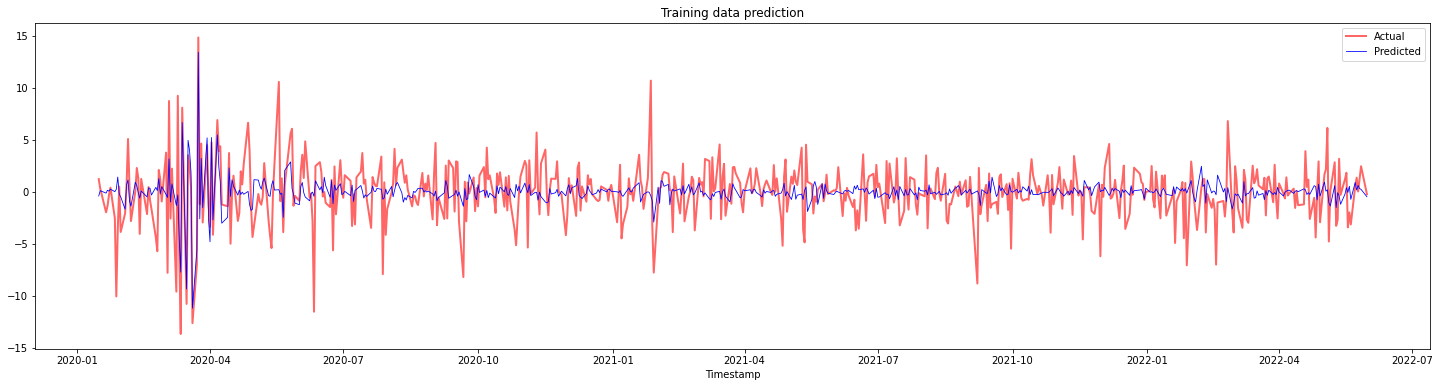

In [30]:
plt.figure(figsize=(25,6))
plt.plot(X_timestamps, y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(X_timestamps, y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

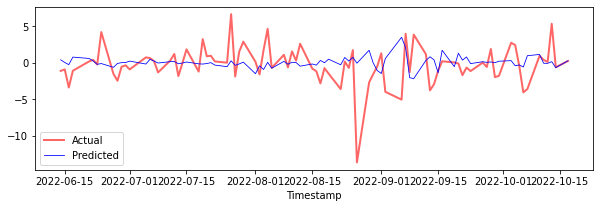

In [31]:
plt.figure(figsize=(10,3))
plt.plot(y_timestamps, y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()

In [32]:
# y_test

In [33]:
# y_test[:,0]

In [34]:
# y_test_pred[:,0]

In [35]:
pred_df = pd.DataFrame(data={'Test':y_test[:,0], 'Pred':y_test_pred[:,0]})
pred_df

,Test,Pred
0,-1.119995,0.388410
1,-0.919998,0.028584
2,-3.389999,-0.269644
3,-1.100006,0.763544
4,0.169998,0.574025
...,...,...
82,0.379997,-0.082463
83,0.110001,-0.092164
84,5.310005,0.140334
85,-0.630005,-0.680732


In [36]:
pred_df['Test B/S'] = pred_df['Test'].map(lambda x : 'Sell' if x >0 else 'Buy')
pred_df['Pred B/S'] = pred_df['Pred'].map(lambda x : 'Sell' if x >0 else 'Buy')

In [37]:
pred_df['Test*Pred'] = pred_df['Test']*pred_df['Pred']
pred_df

,Test,Pred,Test B/S,Pred B/S,Test*Pred
0,-1.119995,0.388410,Buy,Sell,-0.435017
1,-0.919998,0.028584,Buy,Sell,-0.026298
2,-3.389999,-0.269644,Buy,Buy,0.914093
3,-1.100006,0.763544,Buy,Sell,-0.839903
4,0.169998,0.574025,Sell,Sell,0.097583
...,...,...,...,...,...
82,0.379997,-0.082463,Sell,Buy,-0.031336
83,0.110001,-0.092164,Sell,Buy,-0.010138
84,5.310005,0.140334,Sell,Sell,0.745173
85,-0.630005,-0.680732,Buy,Buy,0.428865


In [38]:
pred_df.loc[1, 'Test*Pred']

-0.026297611887896765

In [39]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(len(pred_df)):
    if (pred_df.loc[i, 'Test*Pred'] >0) & (pred_df.loc[i,'Pred'] >0):
        tp +=1
    elif (pred_df.loc[i, 'Test*Pred'] >0) & (pred_df.loc[i,'Pred'] <0):
        tn += 1
    elif (pred_df.loc[i, 'Test*Pred'] <0) & (pred_df.loc[i,'Pred'] >0):
        fp += 1
    elif (pred_df.loc[i, 'Test*Pred'] <0) & (pred_df.loc[i,'Pred'] <0):
        fn += 1

In [40]:
balaned_acc = 0.5*((tp/(tp+fn)) + (tn/(tn+fp))) 
balaned_acc

0.5951086956521738

# With 2 variable

In [41]:
df = ticker('MMM', 2020)
df['B/S'] = df['Diff'].map(lambda x : 'Sell' if x >0 else 'Buy')
df.tail()

,open,high,low,close,adjclose,volume,ticker,Diff,B/S
2022-10-11,108.500000,110.449997,107.949997,108.839996,108.839996,2895400,MMM,0.379997,Sell
2022-10-12,108.570000,109.699997,108.250000,108.949997,108.949997,2751000,MMM,0.110001,Sell
2022-10-13,107.500000,114.830002,107.070000,114.260002,114.260002,4772700,MMM,5.310005,Sell
2022-10-14,114.260002,115.160004,112.849998,113.629997,113.629997,3459300,MMM,-0.630005,Buy
2022-10-17,115.309998,115.714996,113.290001,113.860001,113.860001,2811566,MMM,0.230003,Sell


In [42]:
sep = datetime.datetime(2022, 6, 1)

In [43]:
train = df[df.index < sep][['volume', 'Diff']]
train.tail()

,volume,Diff
2022-05-24,2638800,1.369995
2022-05-25,1876900,0.039993
2022-05-26,2127300,1.250000
2022-05-27,1776700,2.470001
2022-05-31,4144000,-0.220001


In [44]:
test = df[df.index >= sep][['volume', 'Diff']]
test.head()

,volume,Diff
2022-06-01,2410400,-2.869995
2022-06-02,1901400,1.759995
2022-06-03,1876300,-2.209991
2022-06-06,1575600,0.240005
2022-06-07,1805300,0.659988


In [45]:
Vscaler = MinMaxScaler()
Dscaler = MinMaxScaler()
train['Vol_scaler'] = Vscaler.fit_transform(train[['volume']])
train['Diff_scaler'] = Dscaler.fit_transform(train[['Diff']])
train.tail()

,volume,Diff,Vol_scaler,Diff_scaler
2022-05-24,2638800,1.369995,0.182838,0.527183
2022-05-25,1876900,0.039993,0.112574,0.480533
2022-05-26,2127300,1.250000,0.135667,0.522974
2022-05-27,1776700,2.470001,0.103334,0.565767
2022-05-31,4144000,-0.220001,0.321649,0.471414


In [46]:
test['Vol_scaler'] = Vscaler.fit_transform(test[['volume']])
test['Diff_scaler'] = Dscaler.fit_transform(test[['Diff']])
test.tail()

,volume,Diff,Vol_scaler,Diff_scaler
2022-10-11,2895400,0.379997,0.026958,0.691358
2022-10-12,2751000,0.110001,0.024009,0.678024
2022-10-13,4772700,5.310005,0.065305,0.934815
2022-10-14,3459300,-0.630005,0.038477,0.641481
2022-10-17,2811566,0.230003,0.025246,0.683951


In [47]:
# Converting to numpy arrays
train_data = train[['Vol_scaler', 'Diff_scaler']].values
test_data = test[['Vol_scaler', 'Diff_scaler']].values

In [48]:
train_data

array([[0.16698483, 0.42476323],
       [0.12374233, 0.48509298],
       [0.13988103, 0.45387588],
       ...,
       [0.13566653, 0.52297448],
       [0.10333379, 0.56576653],
       [0.32164891, 0.47141359]])

In [49]:
train_data.shape

(607, 2)

In [50]:
timesteps=5

In [51]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])
train_data_timesteps.shape

(603, 5, 2)

In [52]:
# train_data_timesteps

In [53]:
# test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps][:,1]] for i in range(0,len(test_data)-timesteps+1)])
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])

test_data_timesteps.shape

(92, 5, 2)

In [54]:
test_data_timesteps

array([[[0.01705177, 0.5308642 ],
        [0.00665485, 0.75950566],
        [0.00614215, 0.56345697],
        [0.        , 0.68444447],
        [0.00469189, 0.70518437]],

       [[0.00665485, 0.75950566],
        [0.00614215, 0.56345697],
        [0.        , 0.68444447],
        [0.00469189, 0.70518437],
        [0.00277387, 0.60098756]],

       [[0.00614215, 0.56345697],
        [0.        , 0.68444447],
        [0.00469189, 0.70518437],
        [0.00277387, 0.60098756],
        [0.01210659, 0.61135751]],

       [[0.        , 0.68444447],
        [0.00469189, 0.70518437],
        [0.00277387, 0.60098756],
        [0.01210659, 0.61135751],
        [0.08800208, 0.35012328]],

       [[0.00469189, 0.70518437],
        [0.00277387, 0.60098756],
        [0.01210659, 0.61135751],
        [0.08800208, 0.35012328],
        [0.05189065, 0.60938254]],

       [[0.00277387, 0.60098756],
        [0.01210659, 0.61135751],
        [0.08800208, 0.35012328],
        [0.05189065, 0.60938254],
    

In [55]:
# train.head(20)

In [56]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(603, 4, 2) (603, 1, 2)
(92, 4, 2) (92, 1, 2)


In [57]:
x_train

array([[[0.16698483, 0.42476323],
        [0.12374233, 0.48509298],
        [0.13988103, 0.45387588],
        [0.19385807, 0.57488648]],

       [[0.12374233, 0.48509298],
        [0.13988103, 0.45387588],
        [0.19385807, 0.57488648],
        [0.19275142, 0.49912293]],

       [[0.13988103, 0.45387588],
        [0.19385807, 0.57488648],
        [0.19275142, 0.49912293],
        [0.13349933, 0.45352532]],

       ...,

       [[0.32638908, 0.36934402],
        [0.20103288, 0.4984218 ],
        [0.18283764, 0.52718336],
        [0.11257435, 0.480533  ]],

       [[0.20103288, 0.4984218 ],
        [0.18283764, 0.52718336],
        [0.11257435, 0.480533  ],
        [0.13566653, 0.52297448]],

       [[0.18283764, 0.52718336],
        [0.11257435, 0.480533  ],
        [0.13566653, 0.52297448],
        [0.10333379, 0.56576653]]])

In [58]:
y_train[:,0][:, 1]

array([0.49912293, 0.45352532, 0.49491405, 0.49491405, 0.42336045,
       0.52227283, 0.49105627, 0.41038218, 0.43142764, 0.46895859,
       0.49351073, 0.39074058, 0.12662225, 0.35356019, 0.49701849,
       0.34409022, 0.40652387, 0.50192956, 0.65766393, 0.49877237,
       0.38056841, 0.48158522, 0.55980377, 0.52648224, 0.33742527,
       0.52297448, 0.40441996, 0.49526461, 0.45177145, 0.42195713,
       0.32550029, 0.2792005 , 0.55313936, 0.52122061, 0.44686091,
       0.61171523, 0.20624358, 0.78568896, 0.3889867 , 0.5576988 ,
       0.14275717, 0.8032272 , 0.26657333, 0.        , 0.76324072,
       0.10136845, 0.60294638, 0.56962484, 0.49631683, 0.03647873,
       0.23290097, 1.        , 0.43774096, 0.6418801 , 0.37600897,
       0.63696957, 0.43598708, 0.36092626, 0.64644008, 0.33461917,
       0.72150143, 0.61592464, 0.63311125, 0.43668874, 0.43072599,
       0.61031245, 0.30445483, 0.47001027, 0.53384831, 0.38126953,
       0.40757662, 0.54857938, 0.50438456, 0.5727815 , 0.71238

In [59]:
y_train[:,0][:, 1].shape

(603,)

In [60]:
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

In [61]:
model.fit(x_train, y_train[:,0][:, 1])

ValueError: Found array with dim 3. Estimator expected <= 2.

In [6]:
def add_2(value):
    return value + 2

In [8]:
my_list = [1, 2, 5, 7]
map(add_2, my_list)

In [12]:
def add(to_add):
    def custom_add(value):
        return to_add + value
    return custom_add

tt = add(3)

In [13]:
list(map(tt, my_list))

[4, 5, 8, 10]

In [15]:
from typing import Callable, List, Tuple

In [33]:
def create_lag_creator(num_lags: int, col_name: str): #-> Callable[[pd.DataFrame], pd.DataFrame]:
    def lag_creator(df: pd.DataFrame): #-> pd.DataFrame:
        for num in range(num_lags):
            df[f"{col_name}_lag{num + 1}"] = df[col_name].shift(num)
        return df

    return lag_creator

In [34]:
tt = create_lag_creator(3, 'open')

In [35]:
tt(df)

,open,high,low,close,adjclose,volume,ticker,Diff,B/S,open_lag1,open_lag2,open_lag3
2020-01-03,177.020004,178.660004,175.630005,178.449997,161.841248,2466900,MMM,-1.550003,Buy,177.020004,NaN,NaN
2020-01-06,177.149994,178.710007,176.350006,178.619995,161.995422,1998000,MMM,0.169998,Sell,177.149994,177.020004,NaN
2020-01-07,178.279999,178.509995,176.820007,177.899994,161.342438,2173000,MMM,-0.720001,Buy,178.279999,177.149994,177.020004
2020-01-08,178.000000,181.500000,177.649994,180.630005,163.818390,2758300,MMM,2.730011,Sell,178.000000,178.279999,177.149994
2020-01-09,181.509995,181.589996,179.759995,181.199997,164.335297,2746300,MMM,0.569992,Sell,181.509995,178.000000,178.279999
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,115.309998,115.720001,113.290001,113.860001,113.860001,3003500,MMM,0.230003,Sell,115.309998,114.260002,107.500000
2022-10-18,115.739998,116.400002,114.449997,115.949997,115.949997,2564000,MMM,2.089996,Sell,115.739998,115.309998,114.260002
2022-10-19,115.099998,115.680000,113.239998,114.199997,114.199997,2578600,MMM,-1.750000,Buy,115.099998,115.739998,115.309998
2022-10-20,113.980003,115.650002,112.889999,113.110001,113.110001,3142900,MMM,-1.089996,Buy,113.980003,115.099998,115.739998


In [38]:
def add_label_buy_close(df: pd.DataFrame) -> pd.DataFrame:
    df["tomorrow_close"] = df.loc[:, "close"].shift(-1)
    df["label"] = np.where(df.loc[:, "close"] >= df.loc[:, "tomorrow_close"], "SELL", "BUY")
    display(df)
    return df.drop("tomorrow_close", axis=1)

In [39]:
add_label_buy_close(df)

,open,high,low,close,adjclose,volume,ticker,Diff,B/S,open_lag1,open_lag2,open_lag3,tomorrow_close,label
2020-01-03,177.020004,178.660004,175.630005,178.449997,161.841248,2466900,MMM,-1.550003,Buy,177.020004,NaN,NaN,178.619995,BUY
2020-01-06,177.149994,178.710007,176.350006,178.619995,161.995422,1998000,MMM,0.169998,Sell,177.149994,177.020004,NaN,177.899994,SELL
2020-01-07,178.279999,178.509995,176.820007,177.899994,161.342438,2173000,MMM,-0.720001,Buy,178.279999,177.149994,177.020004,180.630005,BUY
2020-01-08,178.000000,181.500000,177.649994,180.630005,163.818390,2758300,MMM,2.730011,Sell,178.000000,178.279999,177.149994,181.199997,BUY
2020-01-09,181.509995,181.589996,179.759995,181.199997,164.335297,2746300,MMM,0.569992,Sell,181.509995,178.000000,178.279999,180.470001,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,115.309998,115.720001,113.290001,113.860001,113.860001,3003500,MMM,0.230003,Sell,115.309998,114.260002,107.500000,115.949997,BUY
2022-10-18,115.739998,116.400002,114.449997,115.949997,115.949997,2564000,MMM,2.089996,Sell,115.739998,115.309998,114.260002,114.199997,SELL
2022-10-19,115.099998,115.680000,113.239998,114.199997,114.199997,2578600,MMM,-1.750000,Buy,115.099998,115.739998,115.309998,113.110001,SELL
2022-10-20,113.980003,115.650002,112.889999,113.110001,113.110001,3142900,MMM,-1.089996,Buy,113.980003,115.099998,115.739998,116.809998,BUY


,open,high,low,close,adjclose,volume,ticker,Diff,B/S,open_lag1,open_lag2,open_lag3,label
2020-01-03,177.020004,178.660004,175.630005,178.449997,161.841248,2466900,MMM,-1.550003,Buy,177.020004,NaN,NaN,BUY
2020-01-06,177.149994,178.710007,176.350006,178.619995,161.995422,1998000,MMM,0.169998,Sell,177.149994,177.020004,NaN,SELL
2020-01-07,178.279999,178.509995,176.820007,177.899994,161.342438,2173000,MMM,-0.720001,Buy,178.279999,177.149994,177.020004,BUY
2020-01-08,178.000000,181.500000,177.649994,180.630005,163.818390,2758300,MMM,2.730011,Sell,178.000000,178.279999,177.149994,BUY
2020-01-09,181.509995,181.589996,179.759995,181.199997,164.335297,2746300,MMM,0.569992,Sell,181.509995,178.000000,178.279999,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,115.309998,115.720001,113.290001,113.860001,113.860001,3003500,MMM,0.230003,Sell,115.309998,114.260002,107.500000,BUY
2022-10-18,115.739998,116.400002,114.449997,115.949997,115.949997,2564000,MMM,2.089996,Sell,115.739998,115.309998,114.260002,SELL
2022-10-19,115.099998,115.680000,113.239998,114.199997,114.199997,2578600,MMM,-1.750000,Buy,115.099998,115.739998,115.309998,SELL
2022-10-20,113.980003,115.650002,112.889999,113.110001,113.110001,3142900,MMM,-1.089996,Buy,113.980003,115.099998,115.739998,BUY
